In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "student-performance-dataset"

# **Import**

In [2]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)


Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘psych’




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/student-performance-dataset/student_performance_data.csv')

**Data Description**   
* **StudentID: Unique identifiers for each student, ensuring data integrity and enabling longitudinal studies.**   
* **Gender and Age: Demographic details that help in analyzing performance trends across different groups.**  
* **GradeLevel: Information on the academic level of students, essential for age-appropriate performance analysis.**
* **MathScore, ReadingScore, WritingScore: Subject-specific scores that allow for a comprehensive evaluation of academic strengths and weaknesses.**
* **Attendance: Records of school attendance, providing a crucial metric for understanding its impact on academic achievement.**
* **Overall, this dataset is an invaluable resource for anyone looking to delve into the intricacies of educational performance and develop data-driven approaches to improve student outcomes.**

In [4]:
str(df)

'data.frame':	500 obs. of  9 variables:
 $ StudentID                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                   : chr  "Male" "Female" "Male" "Male" ...
 $ Age                      : int  24 22 22 24 18 20 19 18 19 24 ...
 $ StudyHoursPerWeek        : int  37 37 10 10 19 17 21 14 9 1 ...
 $ AttendanceRate           : num  90.8 74.9 53.4 70.3 74.9 ...
 $ GPA                      : num  3.47 2.32 2.38 3.46 2.31 2.47 3.93 2.51 3.32 3.96 ...
 $ Major                    : chr  "Arts" "Education" "Business" "Science" ...
 $ PartTimeJob              : chr  "Yes" "No" "No" "Yes" ...
 $ ExtraCurricularActivities: chr  "No" "No" "No" "No" ...


In [5]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
StudentID,1,500,250.50000,144.4818328,250.50,250.50000,185.32500,1.00,500.00,499.00,0.000000000,-1.207202,6.46142399
Gender*,2,500,1.48800,0.5003566,1.00,1.48500,0.00000,1.00,2.00,1.00,0.047869861,-2.001700,0.02237663
Age,3,500,20.95600,2.0005170,21.00,20.94500,2.96520,18.00,24.00,6.00,0.001911222,-1.244298,0.08946584
StudyHoursPerWeek,4,500,19.87600,11.4713472,20.50,19.88000,15.56730,1.00,39.00,38.00,-0.026145692,-1.264700,0.51301424
AttendanceRate,5,500,74.99038,14.5659168,75.73,75.03463,18.16185,50.01,99.97,49.96,-0.050982174,-1.148595,0.65140760
GPA,6,500,2.98516,0.5636204,3.00,2.98235,0.74130,2.00,3.99,1.99,0.013808566,-1.196274,0.02520587
Major*,7,500,2.91000,1.3717373,3.00,2.88750,1.48260,1.00,5.00,4.00,0.068869360,-1.254939,0.06134596
PartTimeJob*,8,500,1.53600,0.4992018,2.00,1.54500,0.00000,1.00,2.00,1.00,-0.143941798,-1.983235,0.02232498
ExtraCurricularActivities*,9,500,1.48000,0.5001002,1.00,1.47500,0.00000,1.00,2.00,1.00,0.079824005,-1.997611,0.02236516


**Check missing value**

In [6]:
colSums(is.na(df))

StudentID                    Gender                       Age 
                        0                         0                         0 
        StudyHoursPerWeek            AttendanceRate                       GPA 
                        0                         0                         0 
                    Major               PartTimeJob ExtraCurricularActivities 
                        0                         0                         0

**Duplicate check**

In [7]:
sum(duplicated(df))

[1] 0

In [8]:
summary(df)

   StudentID        Gender               Age        StudyHoursPerWeek
 Min.   :  1.0   Length:500         Min.   :18.00   Min.   : 1.00    
 1st Qu.:125.8   Class :character   1st Qu.:19.00   1st Qu.:10.00    
 Median :250.5   Mode  :character   Median :21.00   Median :20.50    
 Mean   :250.5                      Mean   :20.96   Mean   :19.88    
 3rd Qu.:375.2                      3rd Qu.:23.00   3rd Qu.:30.00    
 Max.   :500.0                      Max.   :24.00   Max.   :39.00    
 AttendanceRate       GPA           Major           PartTimeJob       
 Min.   :50.01   Min.   :2.000   Length:500         Length:500        
 1st Qu.:62.61   1st Qu.:2.487   Class :character   Class :character  
 Median :75.73   Median :3.000   Mode  :character   Mode  :character  
 Mean   :74.99   Mean   :2.985                                        
 3rd Qu.:87.22   3rd Qu.:3.480                                        
 Max.   :99.97   Max.   :3.990                                        
 ExtraCurricu

In [9]:
head(df)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,Male,24,37,90.75,3.47,Arts,Yes,No
2,2,Female,22,37,74.90,2.32,Education,No,No
3,3,Male,22,10,53.36,2.38,Business,No,No
4,4,Male,24,10,70.26,3.46,Science,Yes,No
5,5,Male,18,19,74.87,2.31,Education,Yes,No
6,6,Female,20,17,86.01,2.47,Business,Yes,No


# **2. Data Visualization**

## **Histogram & Boxplot**

In [10]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

In [11]:
a <- ggplot(df) + geom_histogram(aes(x=Age), fill = 'skyblue', col = 'black', bins = 30, position = 'dodge') +
            labs(title = 'Age Histogram') + 
            theme_bw()

b <- ggplot(df) + geom_boxplot(aes(x= Age), fill = 'blue') + 
            labs(title = 'Age boxplot') + 
            theme_bw()

c <- ggplot(df) + geom_histogram(aes(x=StudyHoursPerWeek), fill = 'skyblue', col = 'black', bins = 30, position = 'dodge') +
            labs(title = 'StudyHoursPerWeek Histogram') + 
            theme_bw()

d <- ggplot(df) + geom_boxplot(aes(x= StudyHoursPerWeek), fill = 'blue') + 
            labs(title = 'StudyHoursPerWeek boxplot') + 
            theme_bw()

e <- ggplot(df) + geom_histogram(aes(x=AttendanceRate), fill = 'skyblue', col = 'black', bins = 30, position = 'dodge') +
            labs(title = 'AttendanceRate Histogram') + 
            theme_bw()

f <- ggplot(df) + geom_boxplot(aes(x= AttendanceRate), fill = 'blue') + 
            labs(title = 'AttendanceRate boxplot') + 
            theme_bw()

g <- ggplot(df) + geom_histogram(aes(x=GPA), fill = 'skyblue', col = 'black', bins = 30, position = 'dodge') +
            labs(title = 'GPA Histogram') + 
            theme_bw()

h <- ggplot(df) + geom_boxplot(aes(x= GPA), fill = 'blue') + 
            labs(title = 'GPA boxplot') + 
            theme_bw()


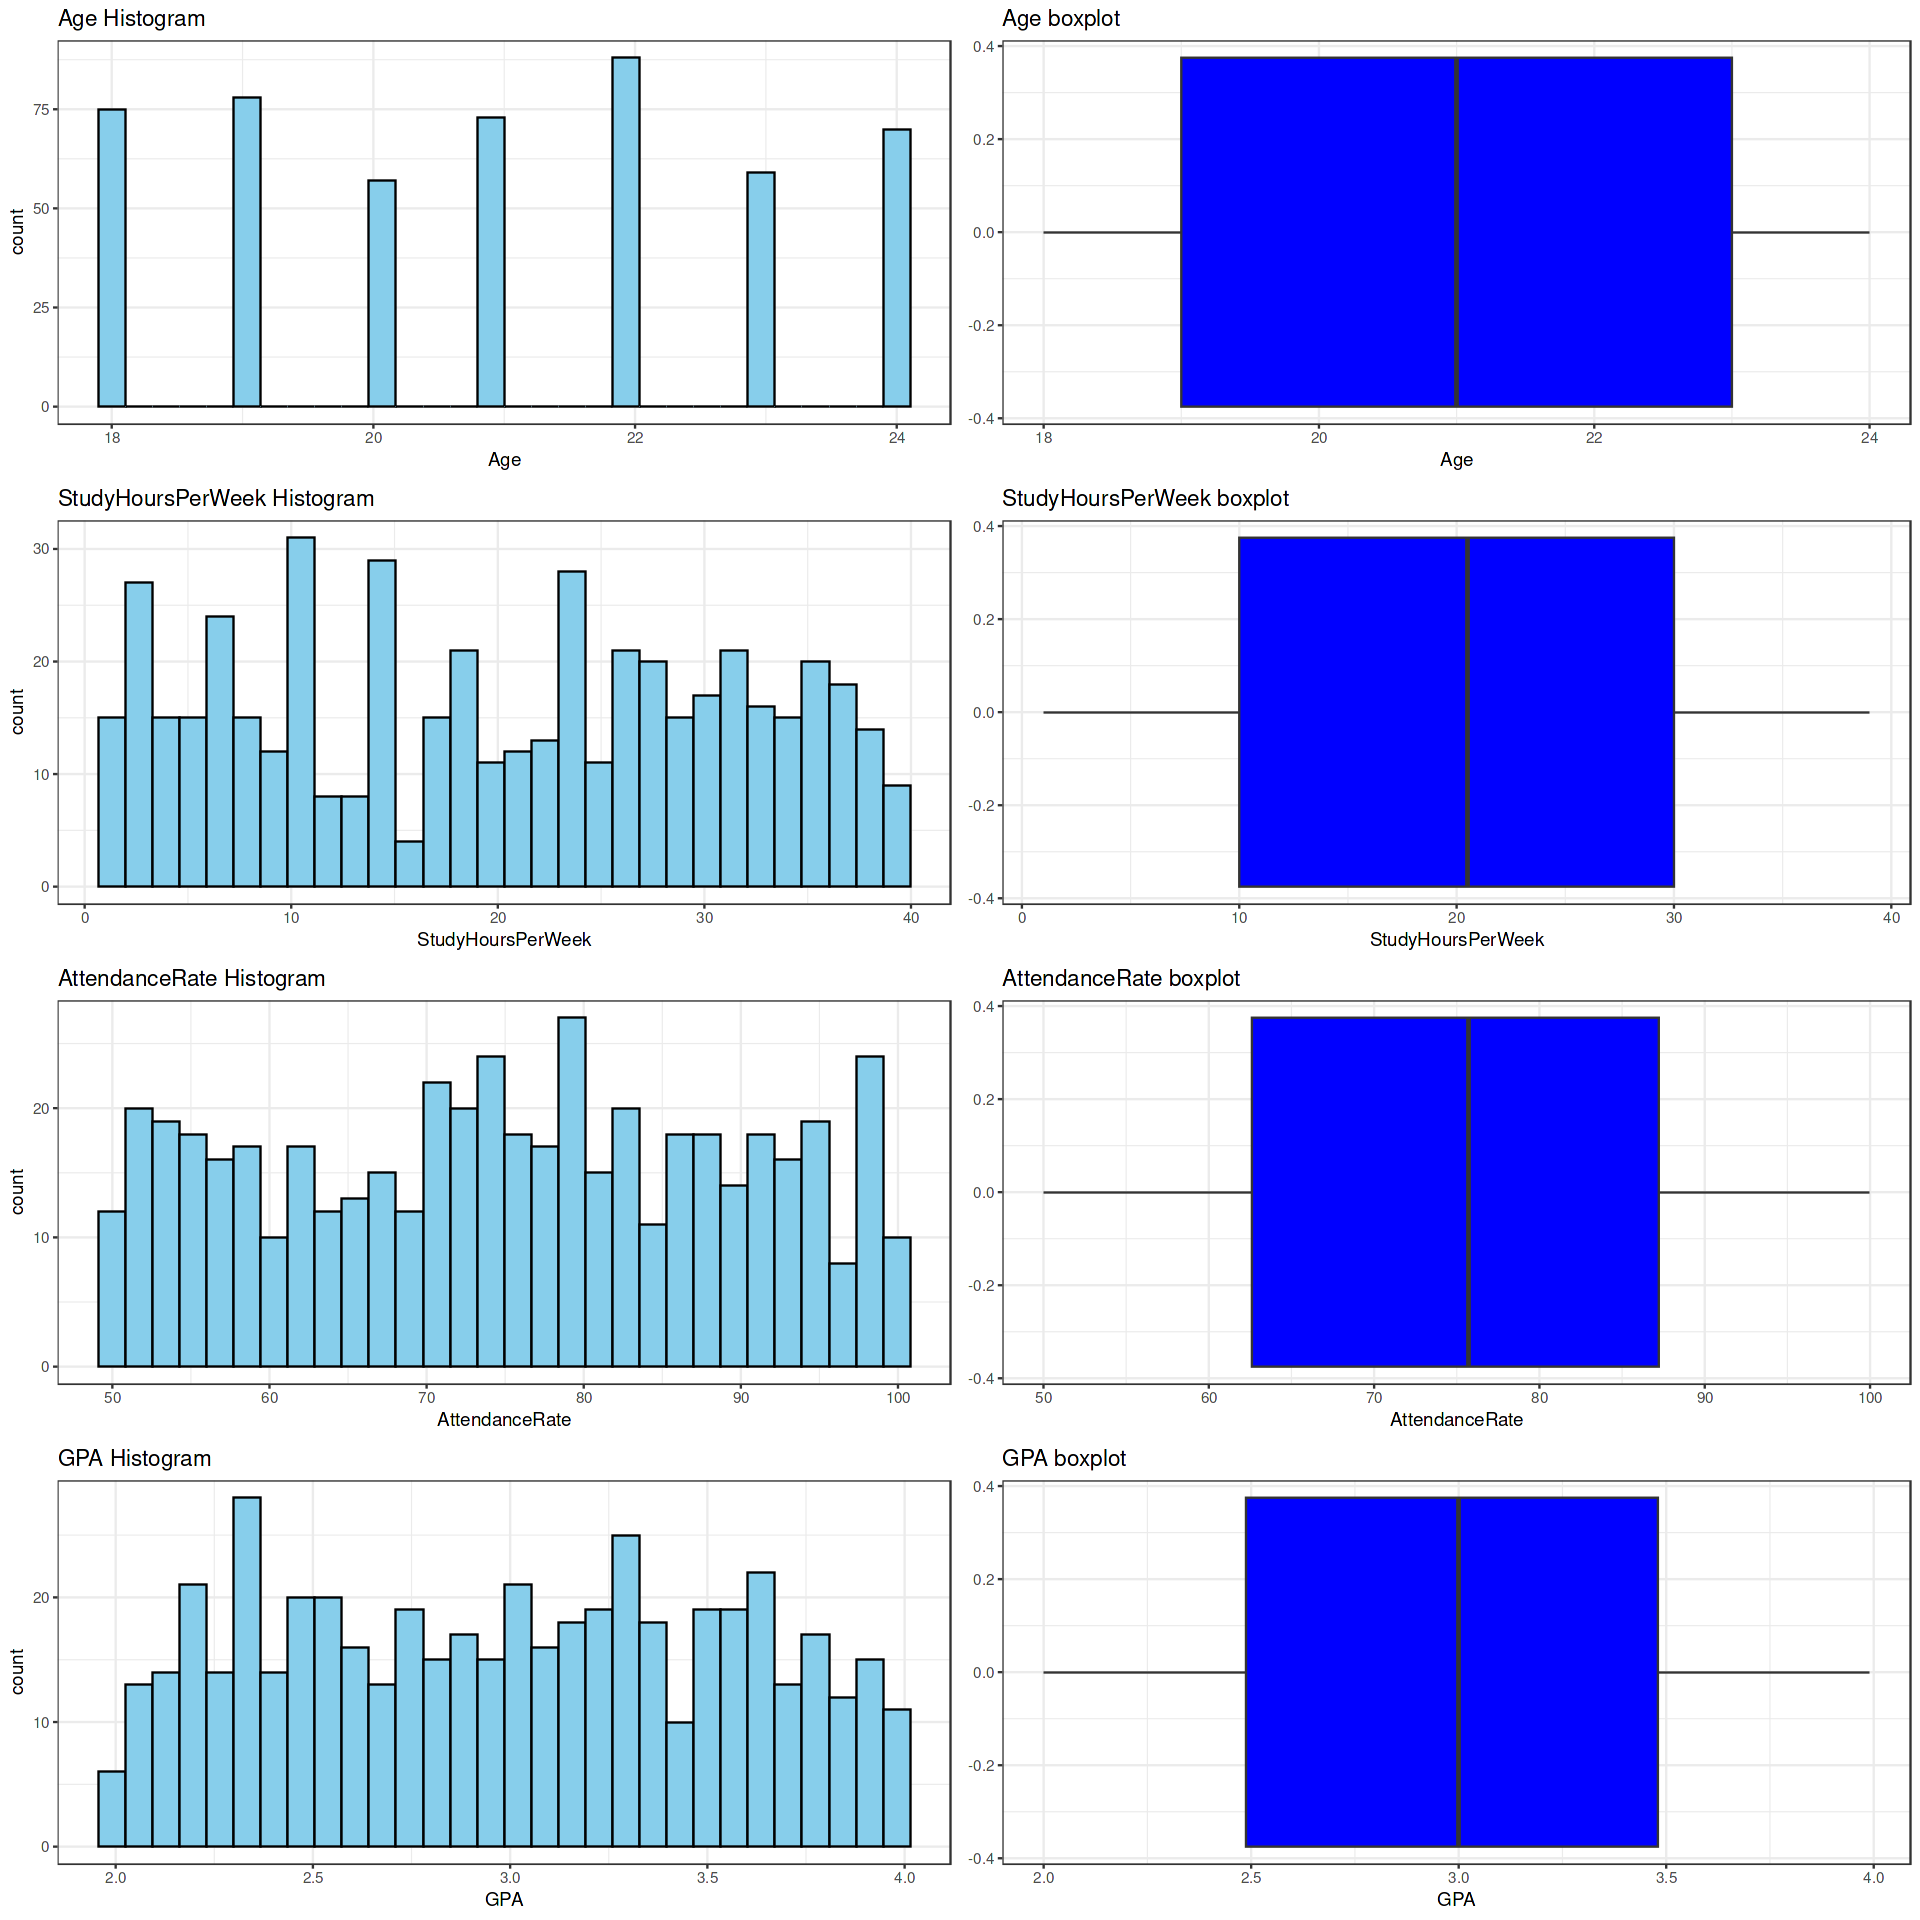

In [12]:
grid.arrange(a,b,c,d,e,f,g,h, ncol = 2)

## **Count Plot**

In [13]:
options(repr.plot.width = 20.0, repr.plot.height = 16.0)

In [14]:
a <- ggplot(df) + geom_bar(aes(x= Gender , fill = Gender), position = 'dodge') +
    theme_bw() +
    ggtitle('Gender Countplot') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

b <- ggplot(df) + geom_bar(aes(x= Major , fill = Major), position = 'dodge') +
    theme_bw() +
    ggtitle('Major Countplot') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

c <- ggplot(df) + geom_bar(aes(x= PartTimeJob , fill = PartTimeJob), position = 'dodge') +
    theme_bw() +
    ggtitle('PartTimeJob Countplot') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

d <- ggplot(df) + geom_bar(aes(x= ExtraCurricularActivities , fill = ExtraCurricularActivities), position = 'dodge') +
    theme_bw() +
    ggtitle('ExtraCurricularActivities Countplot') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

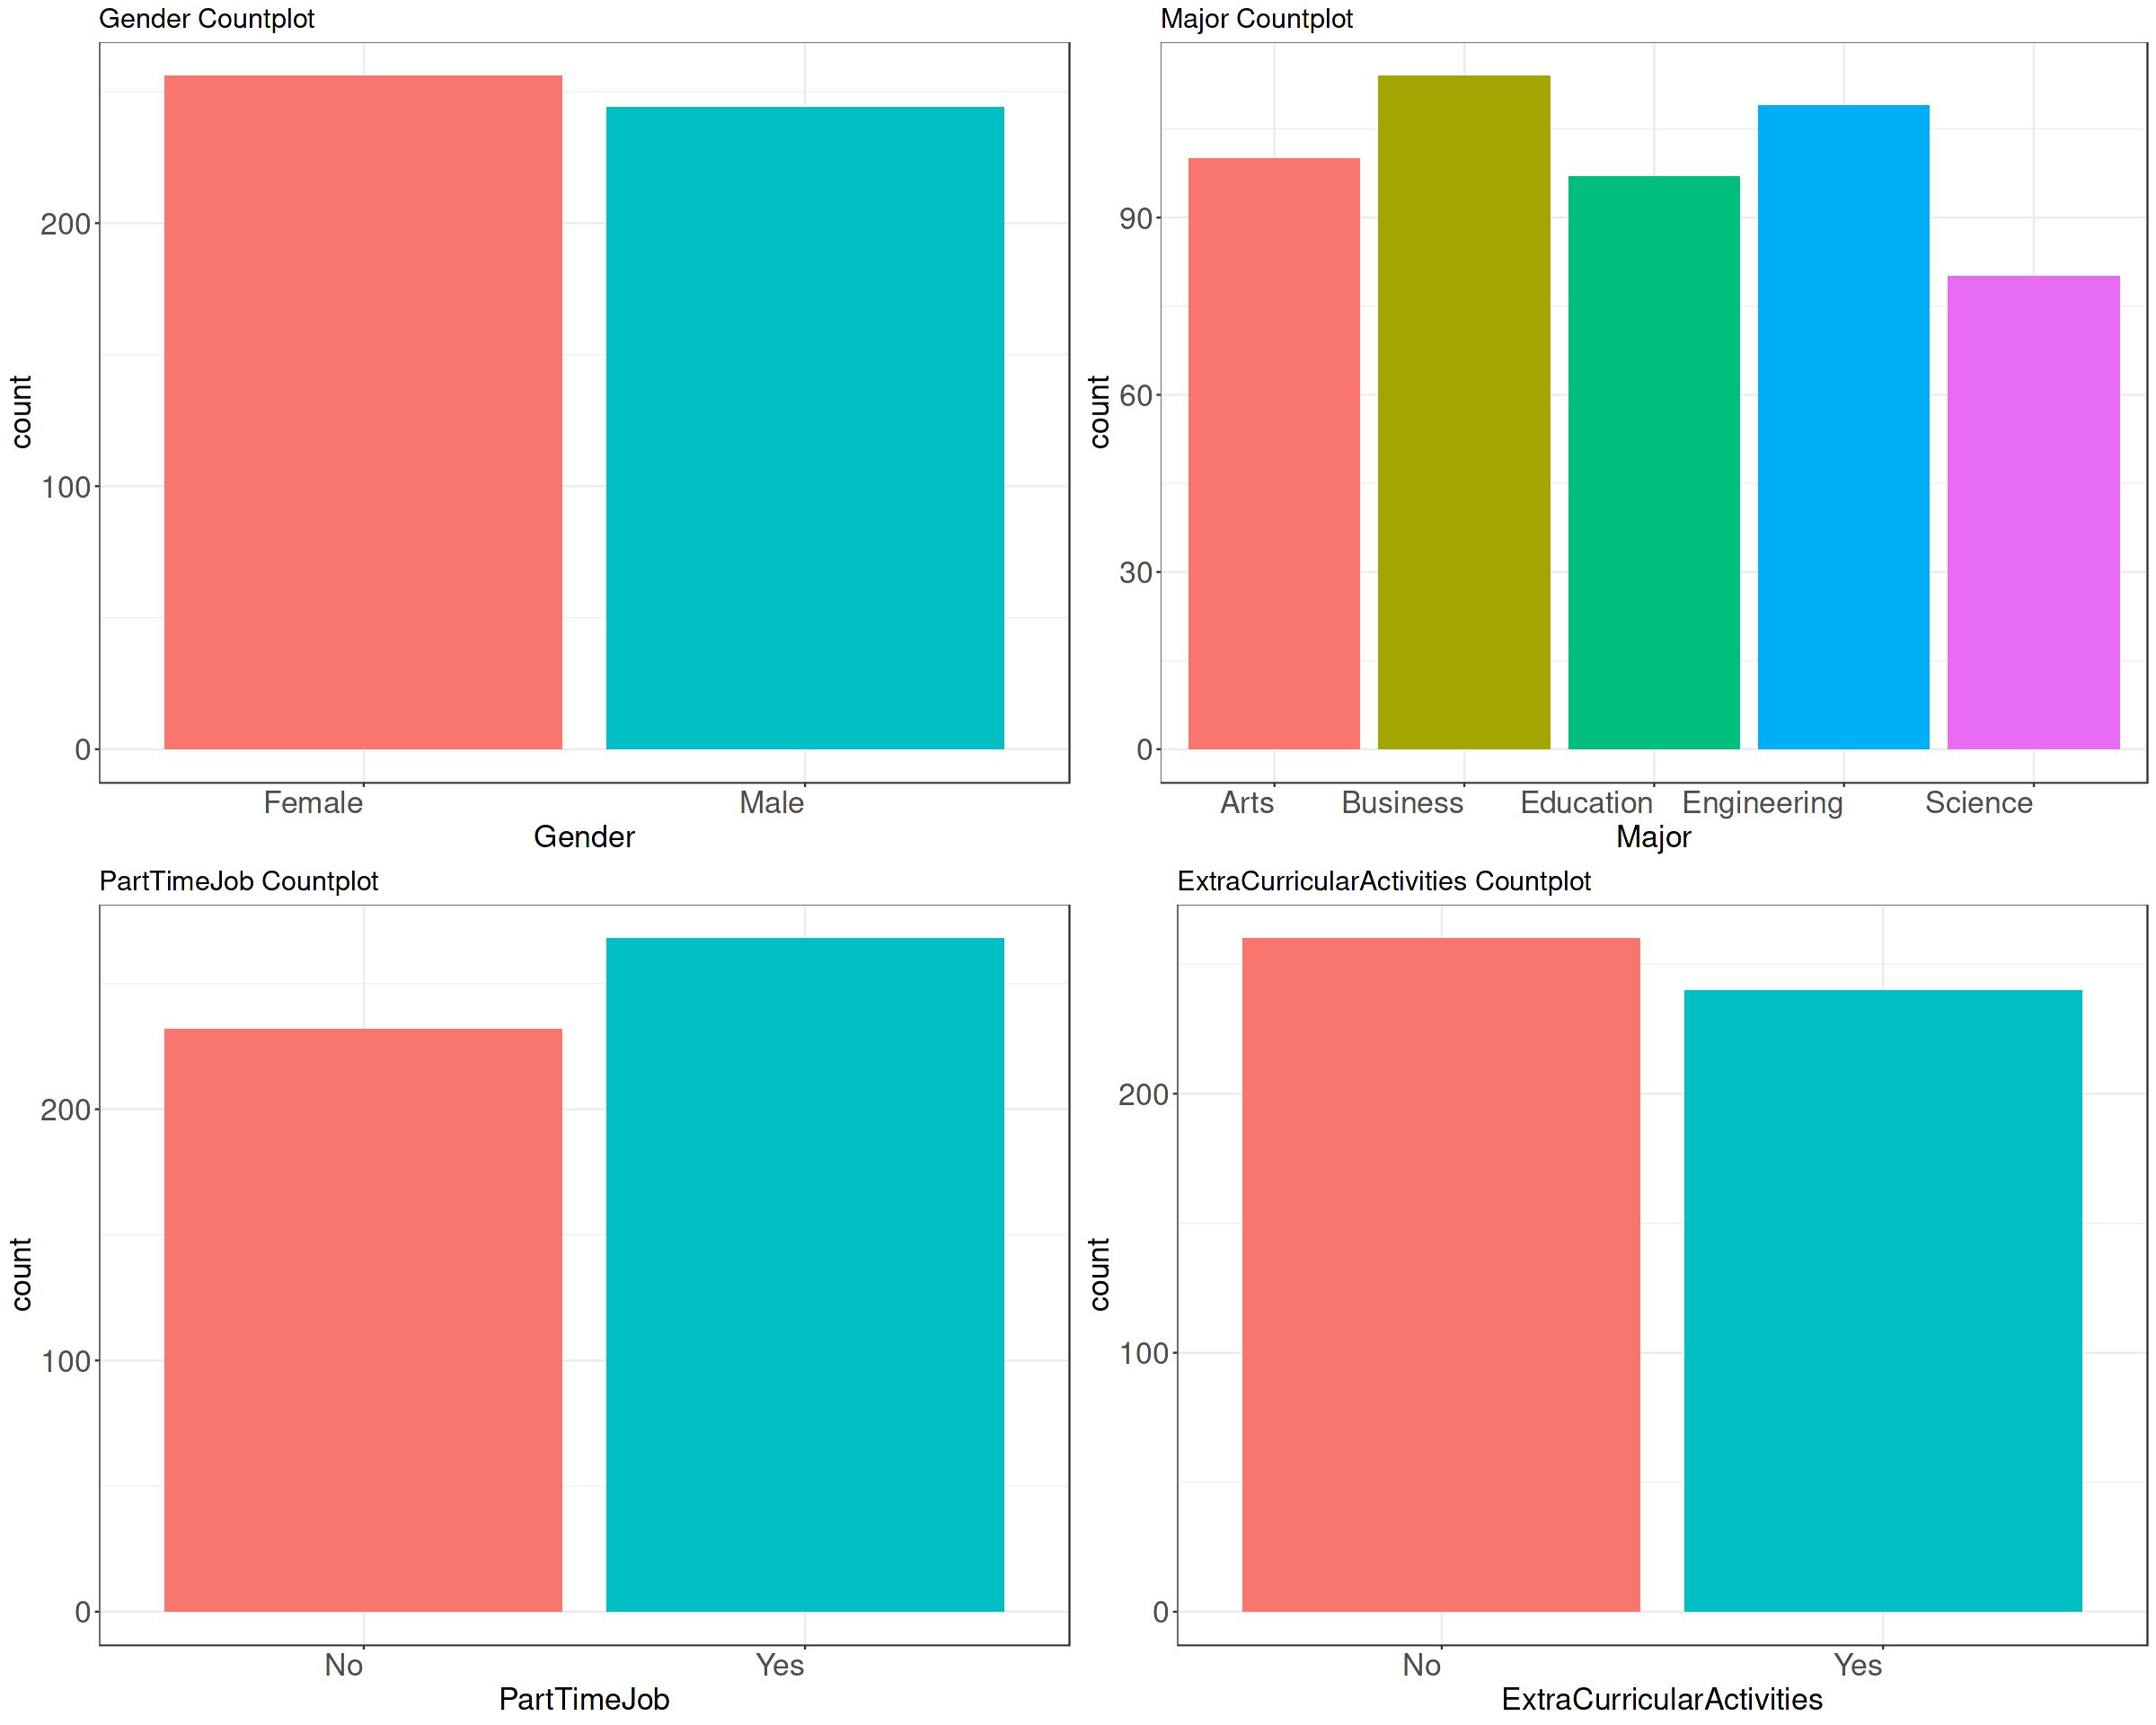

In [15]:
grid.arrange(a,b,c,d, ncol = 2)

## **Average AttendanceRate by part-time job status**

In [16]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

In [17]:
pt_ar <- df %>%
            group_by(PartTimeJob) %>%
            summarize(AttendanceRate = mean(AttendanceRate, na.rm=T))

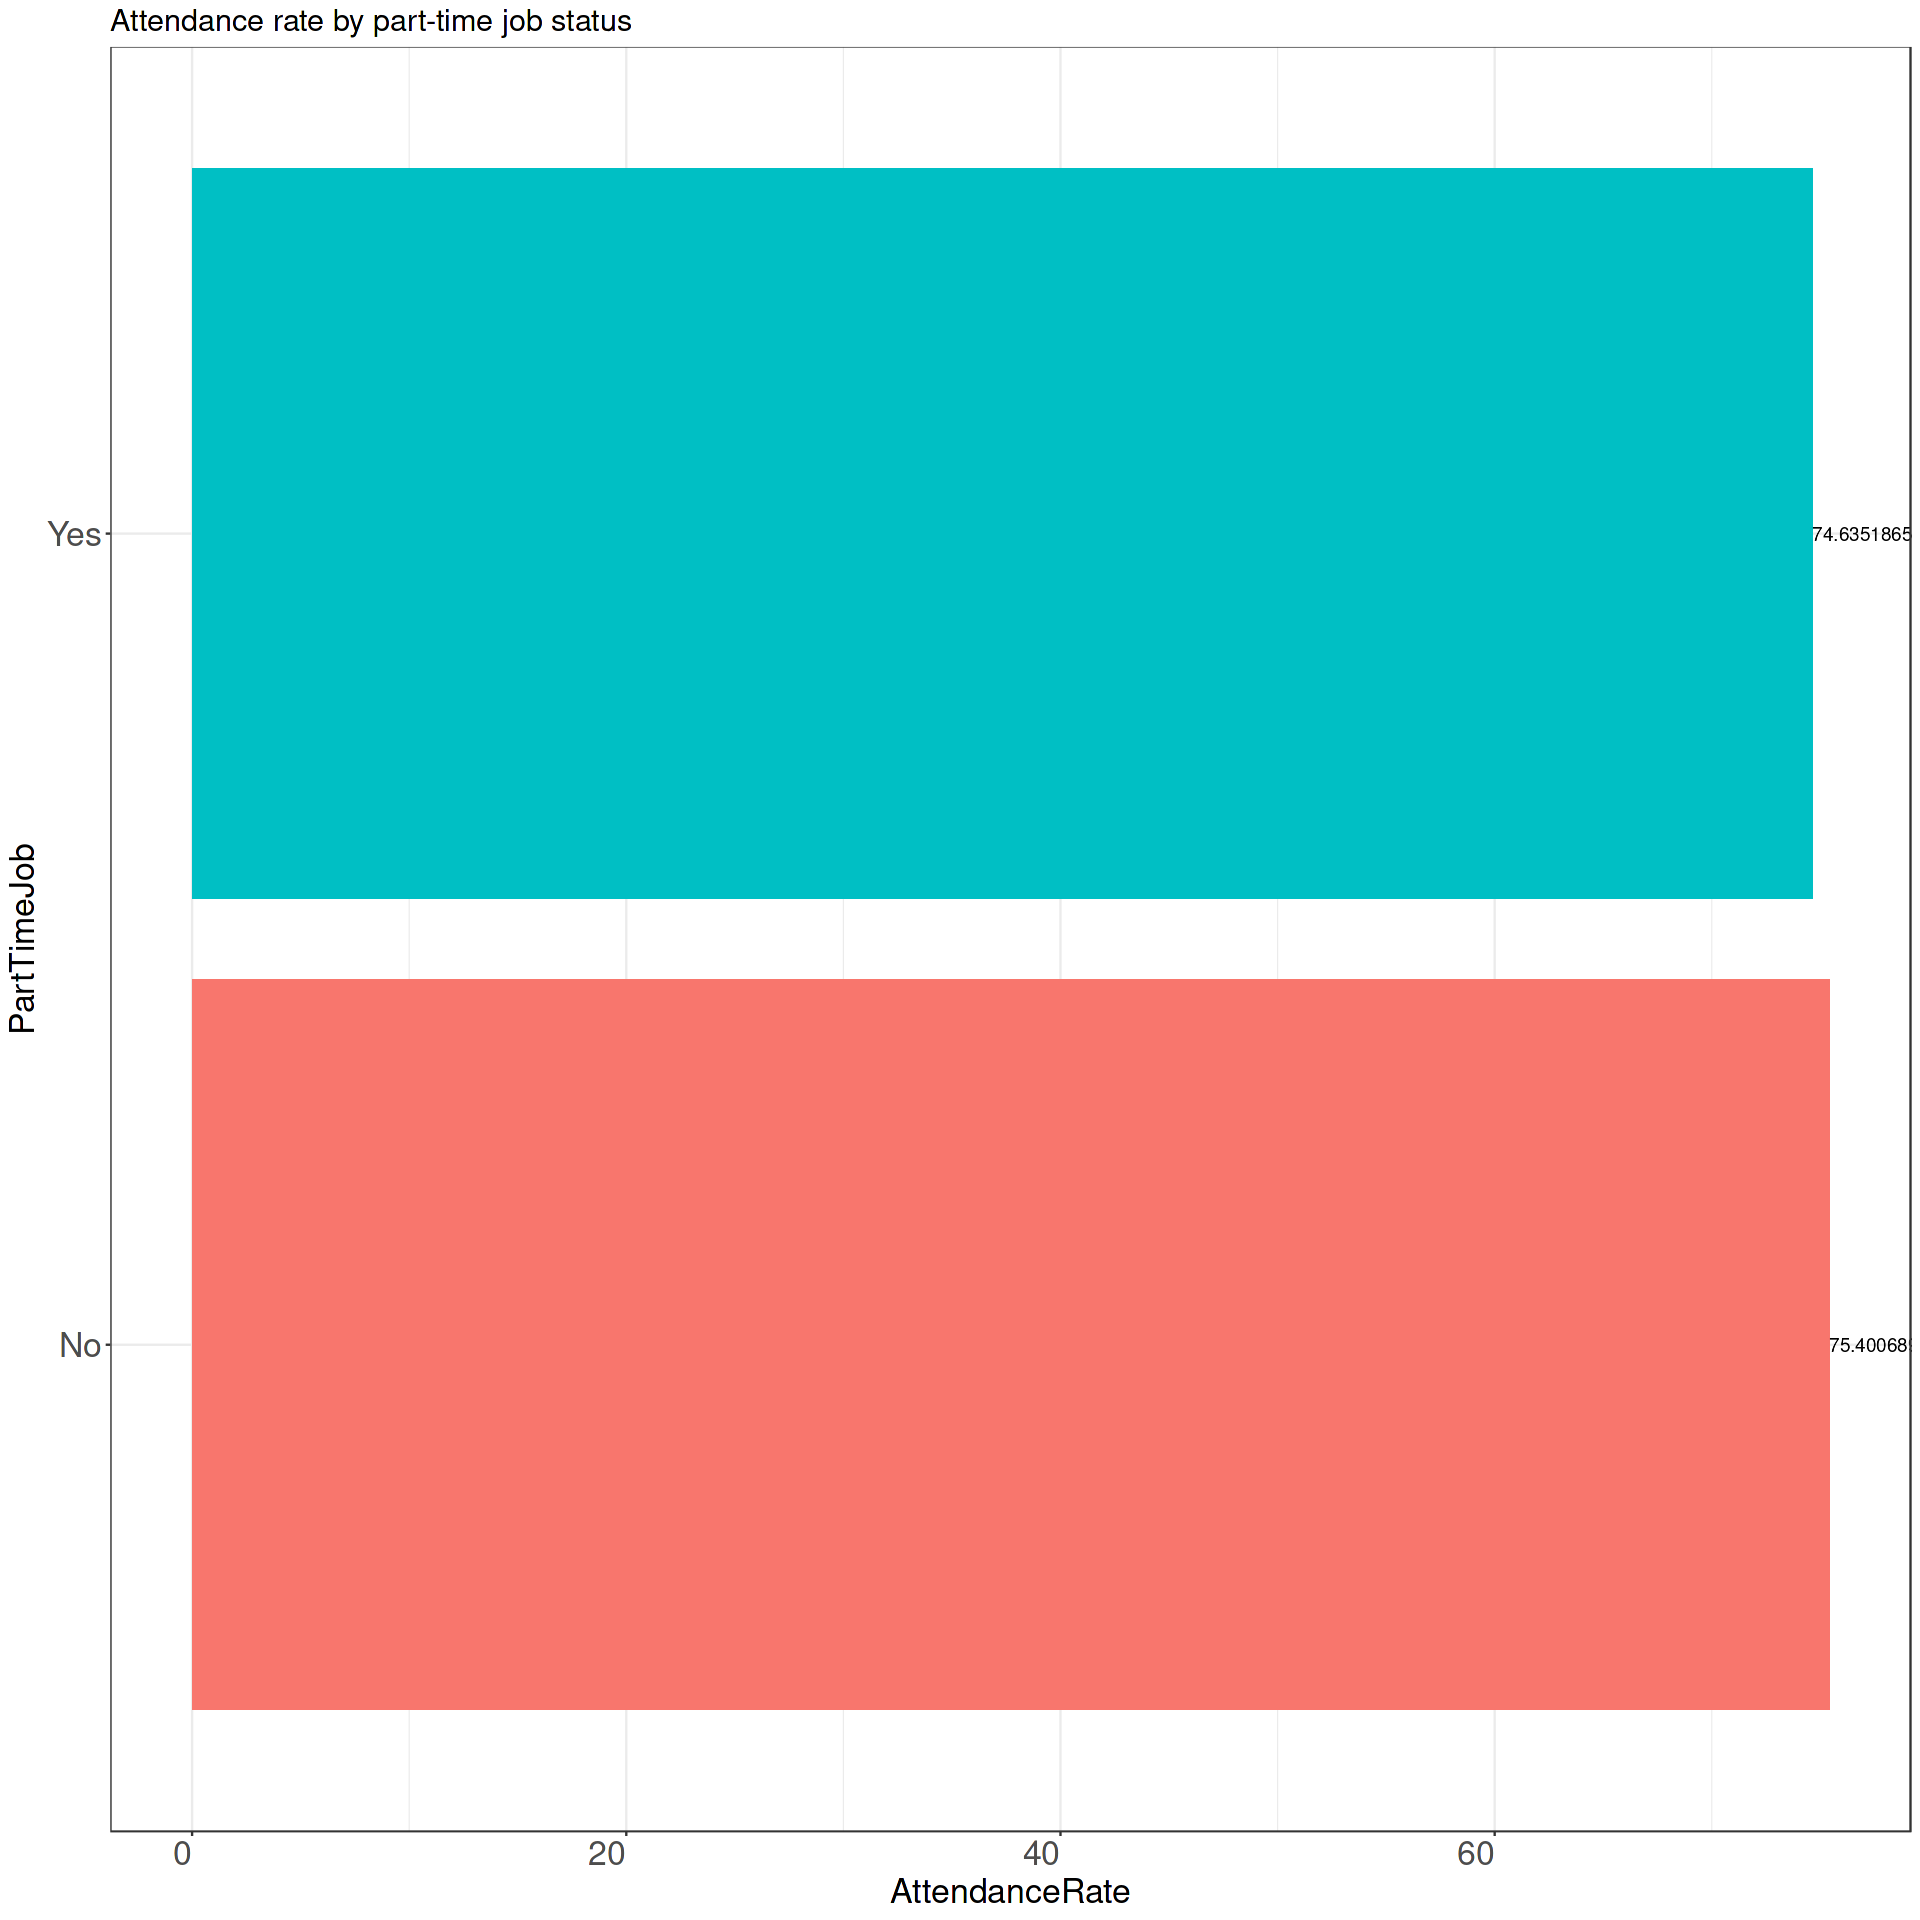

In [18]:
ggplot(pt_ar) + geom_col(aes(x= AttendanceRate ,y = PartTimeJob , fill = PartTimeJob )) +
    geom_text(aes(x= AttendanceRate ,y = PartTimeJob , label = AttendanceRate, hjust=0)) +
    theme_bw() +
    ggtitle('Attendance rate by part-time job status') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

## **Average AttendanceRate by Major**

In [19]:
major_ar <- df %>%
            group_by(Major) %>%
            summarize(AttendanceRate = mean(AttendanceRate, na.rm=T))

In [20]:
major_ar

Major,AttendanceRate
<chr>,<dbl>
Arts,74.31770
Business,75.29623
Education,75.98515
Engineering,75.90367
Science,72.94487


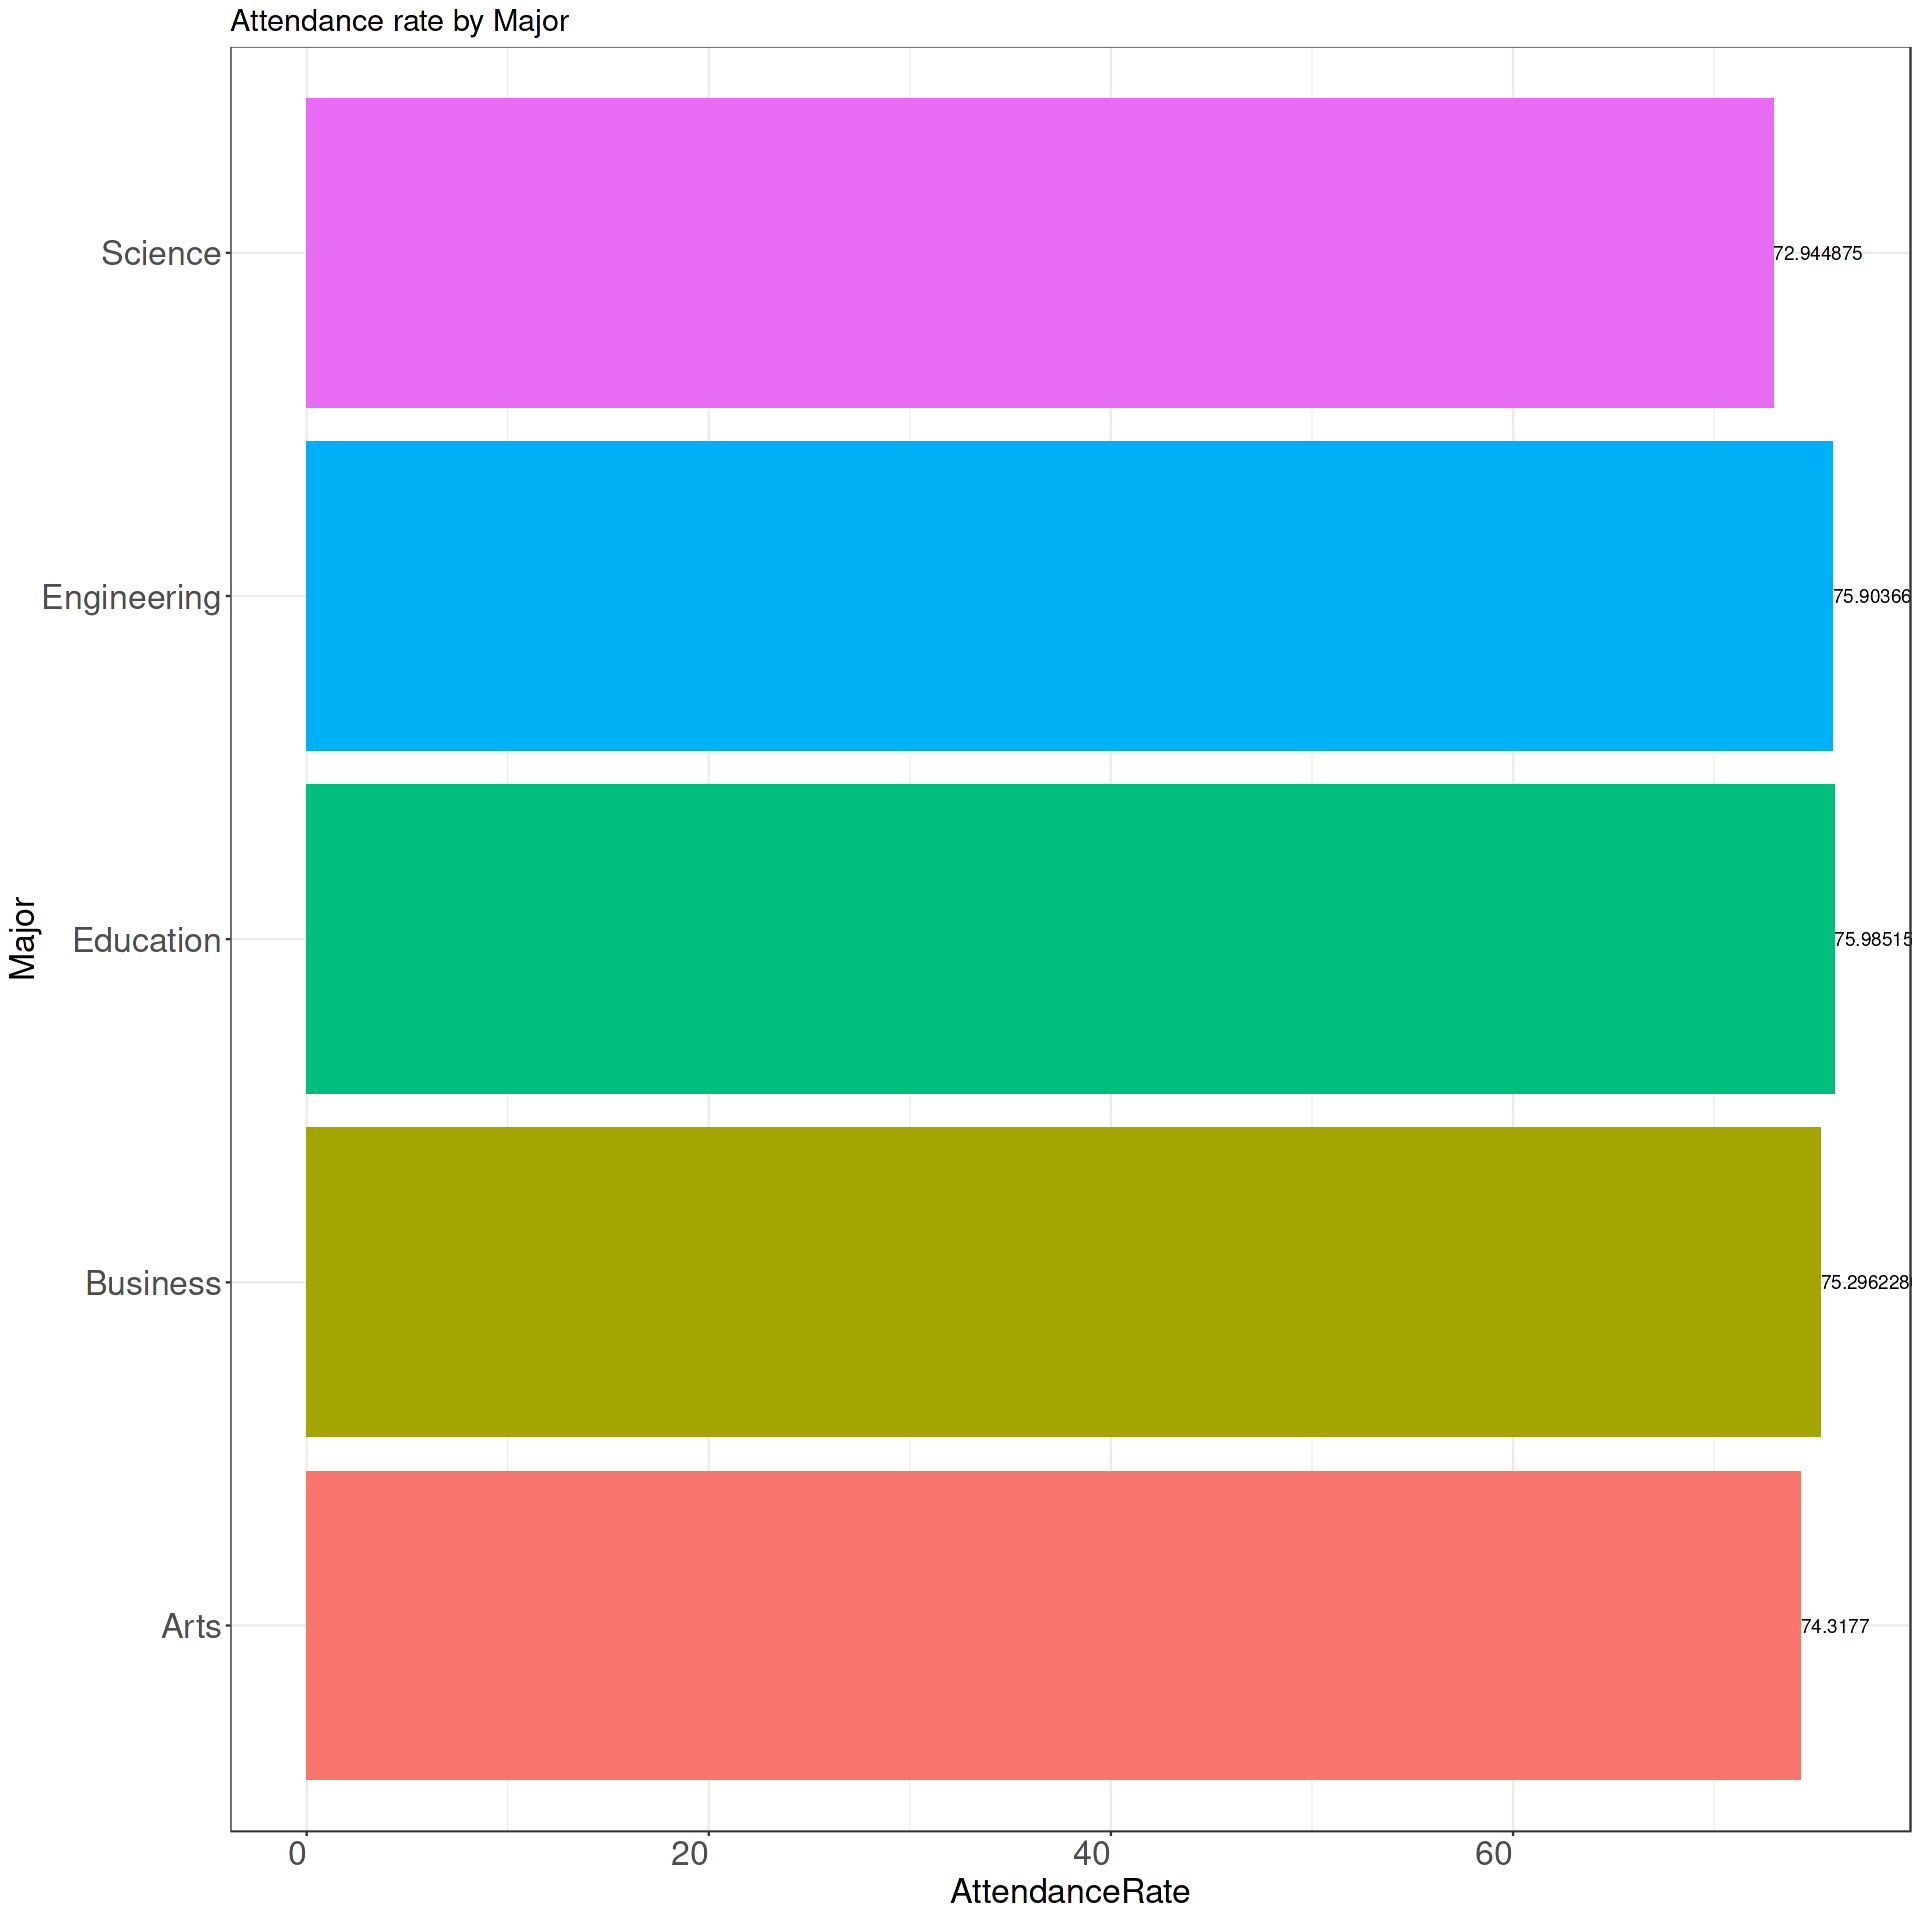

In [21]:
ggplot(major_ar) + geom_col(aes(x= AttendanceRate ,y = Major , fill = Major )) +
    geom_text(aes(x= AttendanceRate ,y = Major , label = AttendanceRate, hjust=0)) +
    theme_bw() +
    ggtitle('Attendance rate by Major') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

## **Correlation**

In [22]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

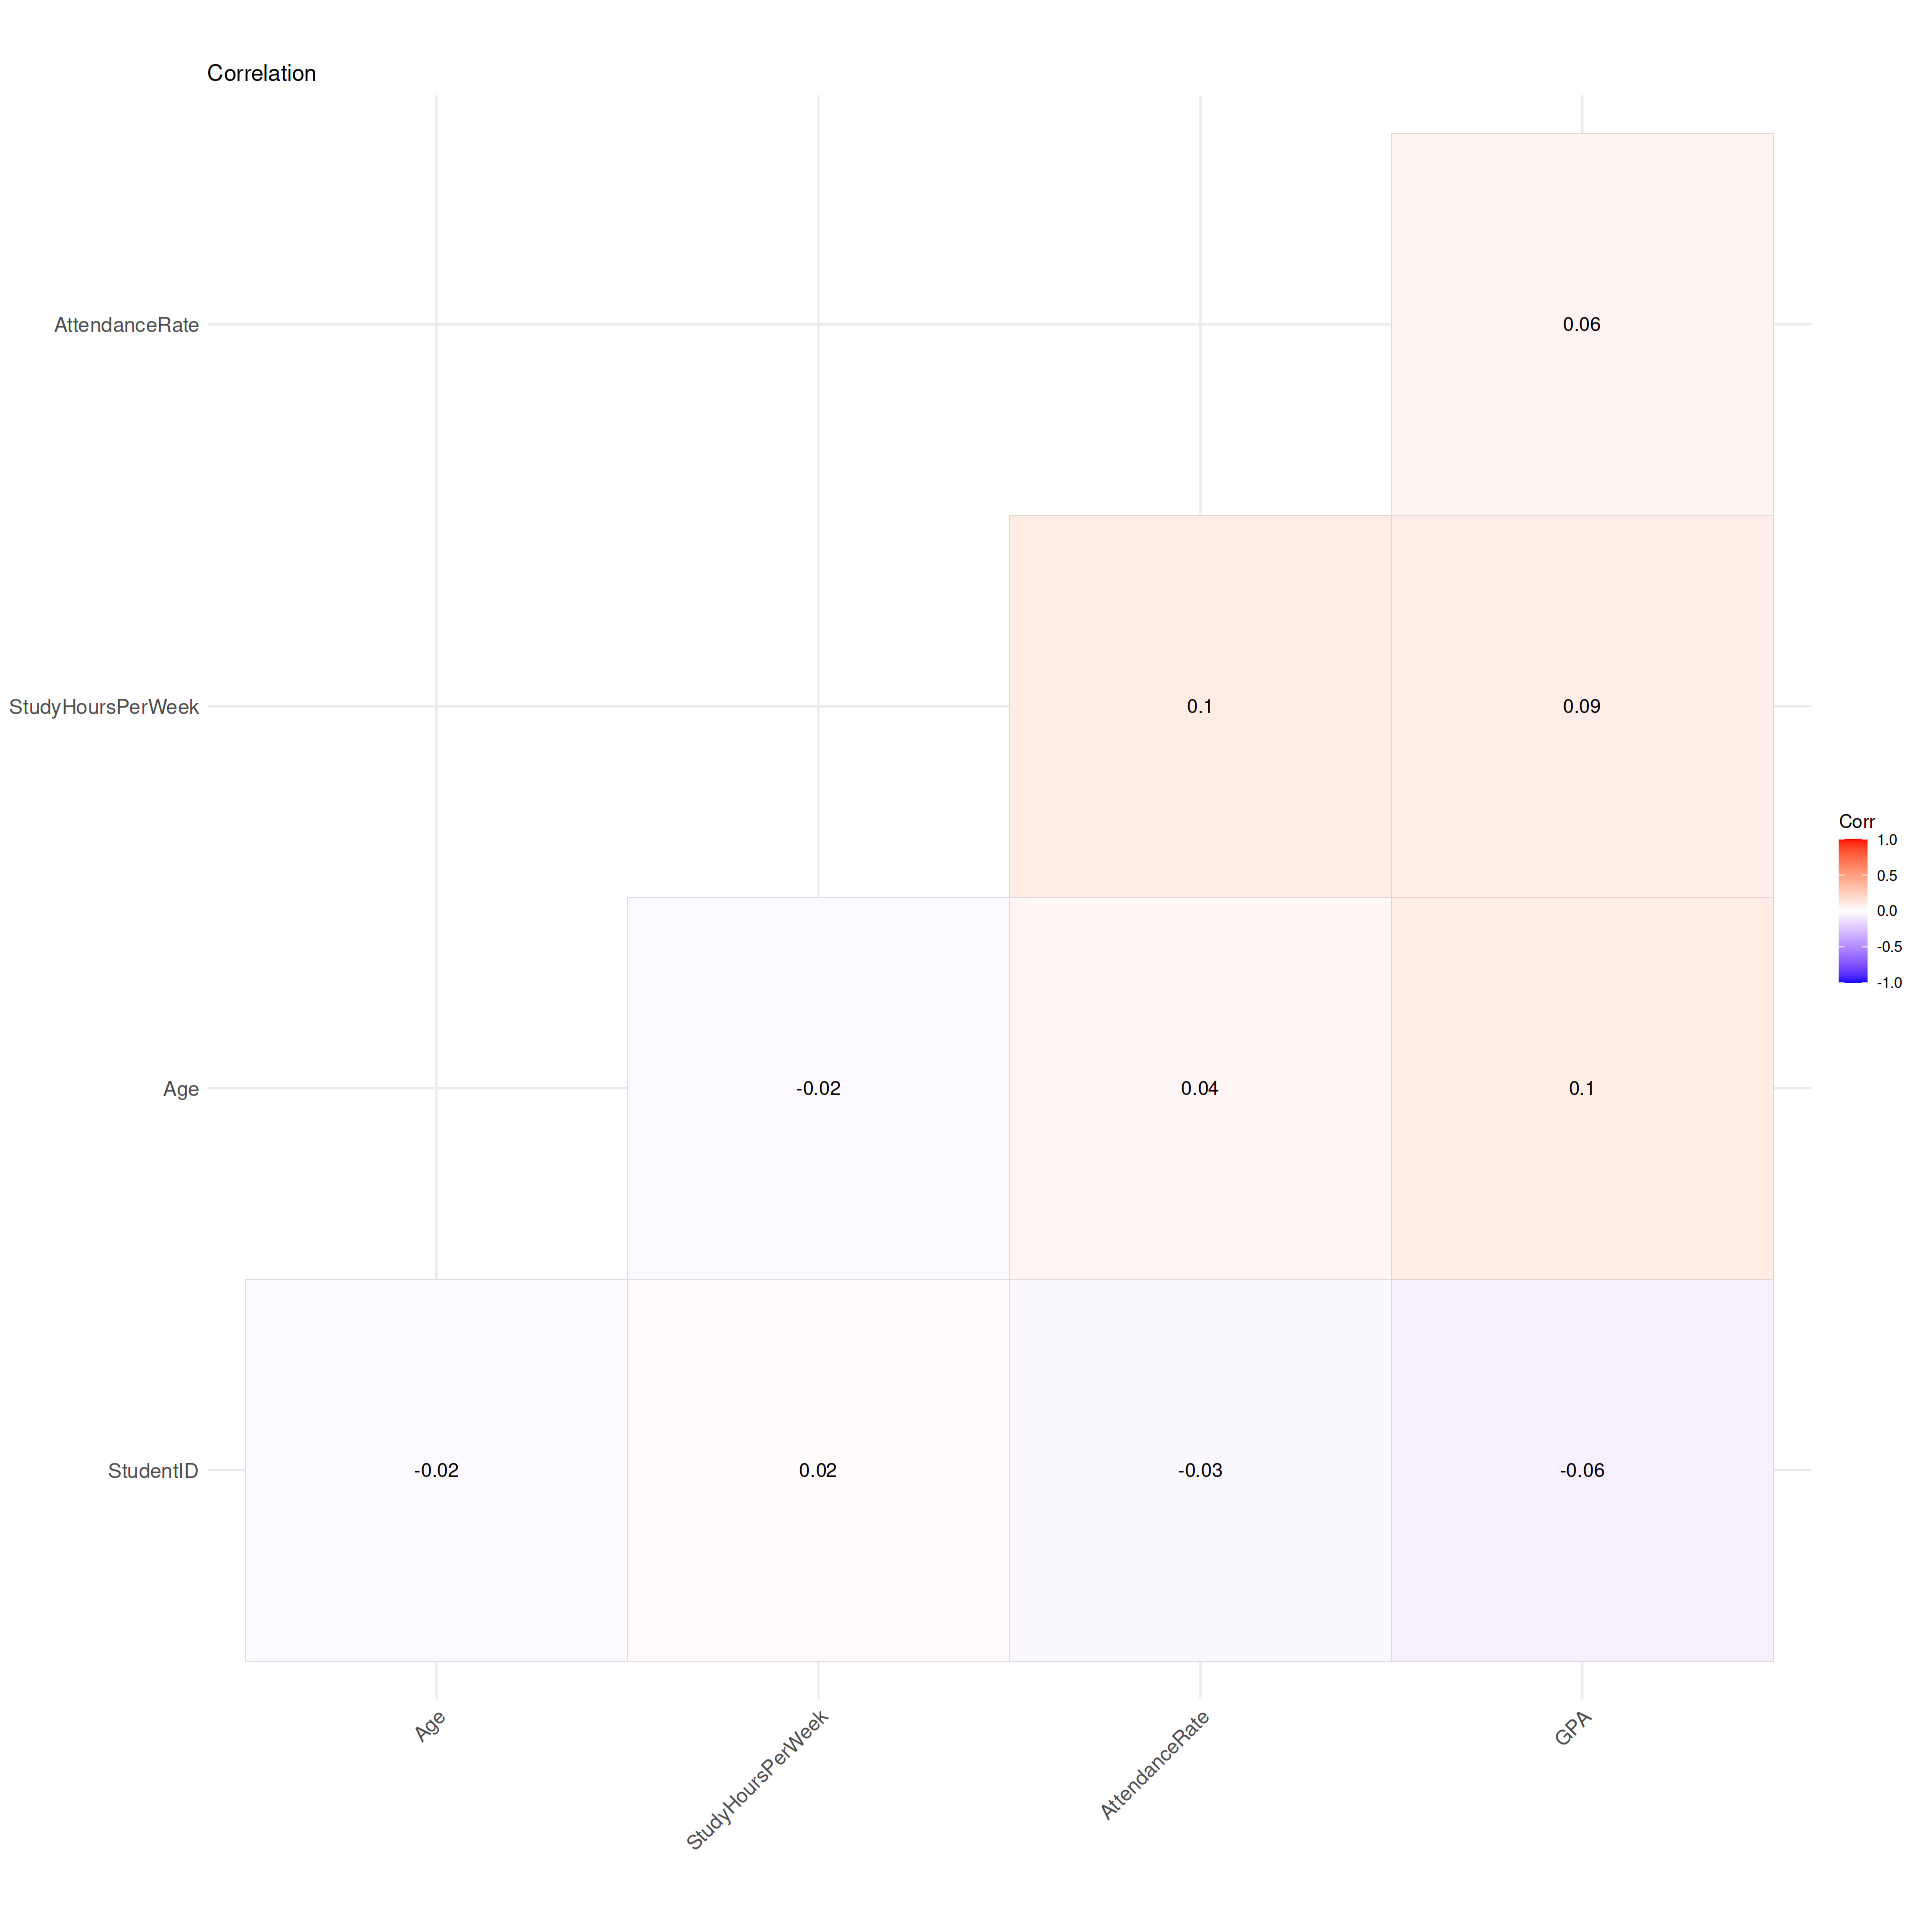

In [23]:
ggcorrplot(cor(df[num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **3. Modeling**

In [24]:
library(tidymodels)
library(finetune)
library(xgboost)
library(bonsai)
library(themis)
library(caret)
library(withr)
library(Metrics)
library(mltools)
library(data.table)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──



✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ psych::%+%()         masks ggplot2::%+%()
✖ scales::alpha()      masks psych::alpha(), ggplot2::alpha()
✖ gridExtra::combine() masks dplyr::combine()
✖ scales::discard()    masks purrr::discard()
✖ dplyr::filter()      masks stats::filter()
✖ recipes::fixed()     masks stringr::fixed()
✖ dplyr::lag()         masks stats::lag()
✖ yardstick::spec()    masks readr::spec()
✖ recipes::step()      masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages




Attaching package: ‘xgboost’




The following object is masked from ‘package:dplyr’:

    slice




Loading required package: lattice




Attaching package: ‘caret’




The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress





Attaching package: ‘Metrics’




The following objects are masked from ‘package:caret’:

    precision, recall




The following objects are masked from ‘package:yardstick’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape





Attaching package: ‘mltools’




The following objects are masked from ‘package:Metrics’:

    mse, msle, rmse, rmsle




The following objects are masked from ‘package:yardstick’:

    mcc, rmse




The following object is masked from ‘package:tidyr’:

    replace_na





Attaching package: ‘data.table’




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose




## **Preprocessing**

In [25]:
df <- df[,-1]

In [26]:
df$Gender <- ifelse(df$Gender == 'Male',1,0)
df$Major <- as.factor(df$Major)
df$PartTimeJob <- ifelse(df$PartTimeJob == 'Yes',1,0)
df$ExtraCurricularActivities <- ifelse(df$ExtraCurricularActivities == 'Yes','1','0')

In [27]:
encoding_data <- one_hot(as.data.table(df[,-12]))
encoding_data$ExtraCurricularActivities <- as.factor(df$ExtraCurricularActivities)

## **Train Test Split**

In [28]:
idx <- sample(1:nrow(df), 0.7 * nrow(encoding_data))
train <- encoding_data[idx,]
test <- encoding_data[-idx,]

## **Simple XGB Model**

In [29]:
xgb_rec <-
  recipe(ExtraCurricularActivities ~ ., data = train) %>% 
      step_dummy(all_nominal_predictors()) %>%
      step_YeoJohnson(all_numeric_predictors())

In [30]:
xgb_spec <- boost_tree() %>%
  set_engine('xgboost' ,
             nthread  = future::availableCores()) %>%
  set_mode('classification')

In [31]:
xgb_wf <- workflow() %>%
  add_recipe(xgb_rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [32]:
model_xgb =
  xgb_wf %>% 
  fit(train) %>%
  with_seed(7, .)

In [33]:
model_xgb

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 37.1 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 15, watchlist = x$watchlist, 
    verbose = 0, nthread = c(system = 4), objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "4", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 11 
niter: 15
nfea

In [34]:
pred_xgb <- predict(model_xgb, test)

In [35]:
cm_xgb <- confusionMatrix(pred_xgb$.pred_class, test$ExtraCurricularActivities)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 42 39
         1 36 33
                                          
               Accuracy : 0.5             
                 95% CI : (0.4174, 0.5826)
    No Information Rate : 0.52            
    P-Value [Acc > NIR] : 0.7165          
                                          
                  Kappa : -0.0032         
                                          
 Mcnemar's Test P-Value : 0.8174          
                                          
            Sensitivity : 0.5385          
            Specificity : 0.4583          
         Pos Pred Value : 0.5185          
         Neg Pred Value : 0.4783          
             Prevalence : 0.5200          
         Detection Rate : 0.2800          
   Detection Prevalence : 0.5400          
      Balanced Accuracy : 0.4984          
                                          
       'Positive' Class : 0               
                                    